# [CDAF] Atividade 1

## Nome e matrícula
Nome: Lucas Affonso Pires
Matrícula: 2023028420

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão a partir dos dados de
súmula.


Para isso utilizaremos o dataset "Soccer Prediction Challenge", disponível no Moodle.

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie 4 histogramas:
    a) um para a quantidade de gols marcados por jogo pelos times mandantes
    b) um para a quantidade de gols marcados por jogo pelos time visitantes
    c) um para a quantidade total de gols em cada partida
    d) um para a diferença de gols por partida
- Caso hajam jogos com erros claros de anotação, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média dos valores representados em cada um dos 4 histogramas.

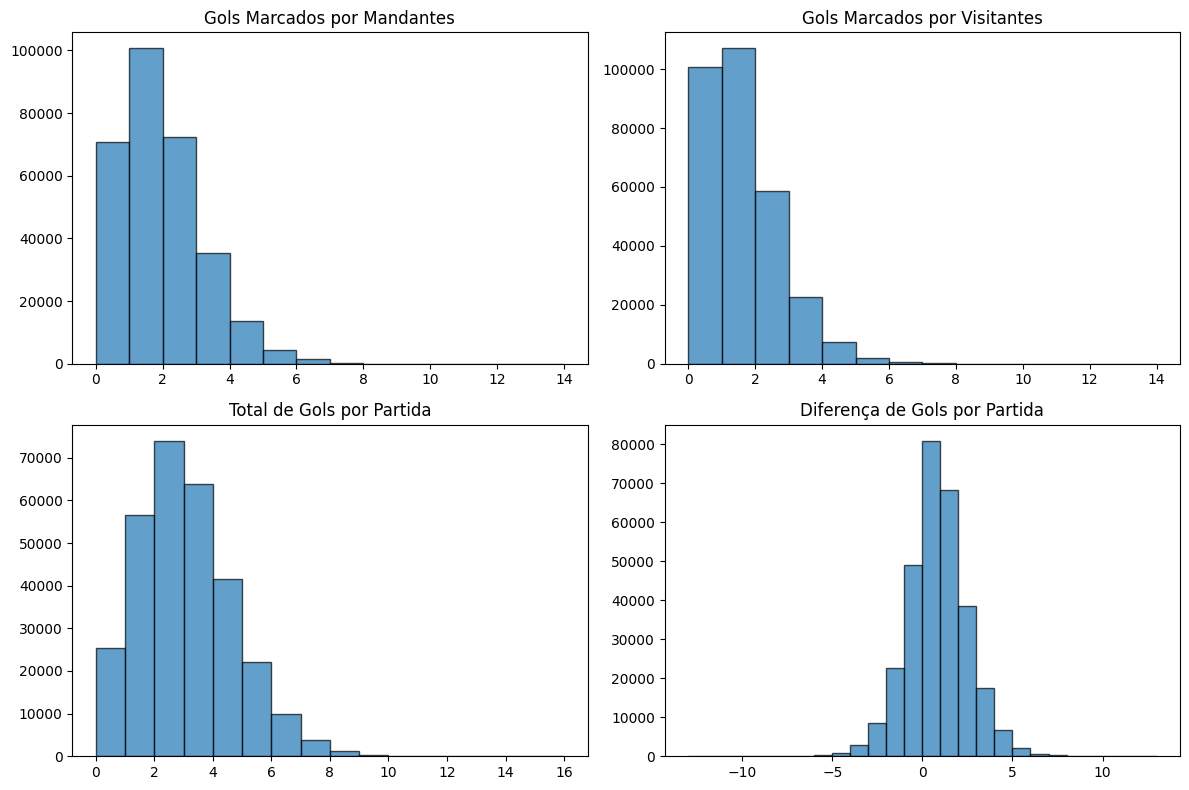

{'Gols Mandantes': {'Min': 0, 'Max': 13, 'Média': 1.471700194179949},
 'Gols Visitantes': {'Min': 0, 'Max': 13, 'Média': 1.1214410090673013},
 'Total de Gols': {'Min': 0, 'Max': 15, 'Média': 2.5931412032472503},
 'Diferença de Gols': {'Min': -13, 'Max': 12, 'Média': 0.35025918511264775}}

In [30]:
import pandas as pd

file_path = "/content/TrainingSet_2023_02_08.xlsx"
df = pd.read_excel(file_path)

df.head()
df_clean = df[(df["HS"] >= 0) & (df["AS"] >= 0) & (df["GD"] == df["HS"] - df["AS"])]

import matplotlib.pyplot as plt

gols_mandante = df_clean["HS"]
gols_visitante = df_clean["AS"]
gols_totais = df_clean["HS"] + df_clean["AS"]
diferenca_gols = df_clean["GD"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(gols_mandante, bins=range(0, max(gols_mandante)+2), edgecolor='black', alpha=0.7)
axes[0, 0].set_title("Gols Marcados por Mandantes")

axes[0, 1].hist(gols_visitante, bins=range(0, max(gols_visitante)+2), edgecolor='black', alpha=0.7)
axes[0, 1].set_title("Gols Marcados por Visitantes")

axes[1, 0].hist(gols_totais, bins=range(0, max(gols_totais)+2), edgecolor='black', alpha=0.7)
axes[1, 0].set_title("Total de Gols por Partida")

axes[1, 1].hist(diferenca_gols, bins=range(min(diferenca_gols), max(diferenca_gols)+2), edgecolor='black', alpha=0.7)
axes[1, 1].set_title("Diferença de Gols por Partida")

plt.tight_layout()
plt.show()

estatisticas = {
    "Gols Mandantes": {"Min": int(gols_mandante.min()), "Max": int(gols_mandante.max()), "Média": float(gols_mandante.mean())},
    "Gols Visitantes": {"Min": int(gols_visitante.min()), "Max": int(gols_visitante.max()), "Média": float(gols_visitante.mean())},
    "Total de Gols": {"Min": int(gols_totais.min()), "Max": int(gols_totais.max()), "Média": float(gols_totais.mean())},
    "Diferença de Gols": {"Min": int(diferenca_gols.min()), "Max": int(diferenca_gols.max()), "Média": float(diferenca_gols.mean())}
}

estatisticas

## Questão 2
- Escolha uma temporada já finalizada de alguma das ligas presentes no dataset.
- Repita os 4 histogramas da questão 1 utilizando apenas dados do campeonato selecionado.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre as características da liga escolhida quando comparada ao todo?

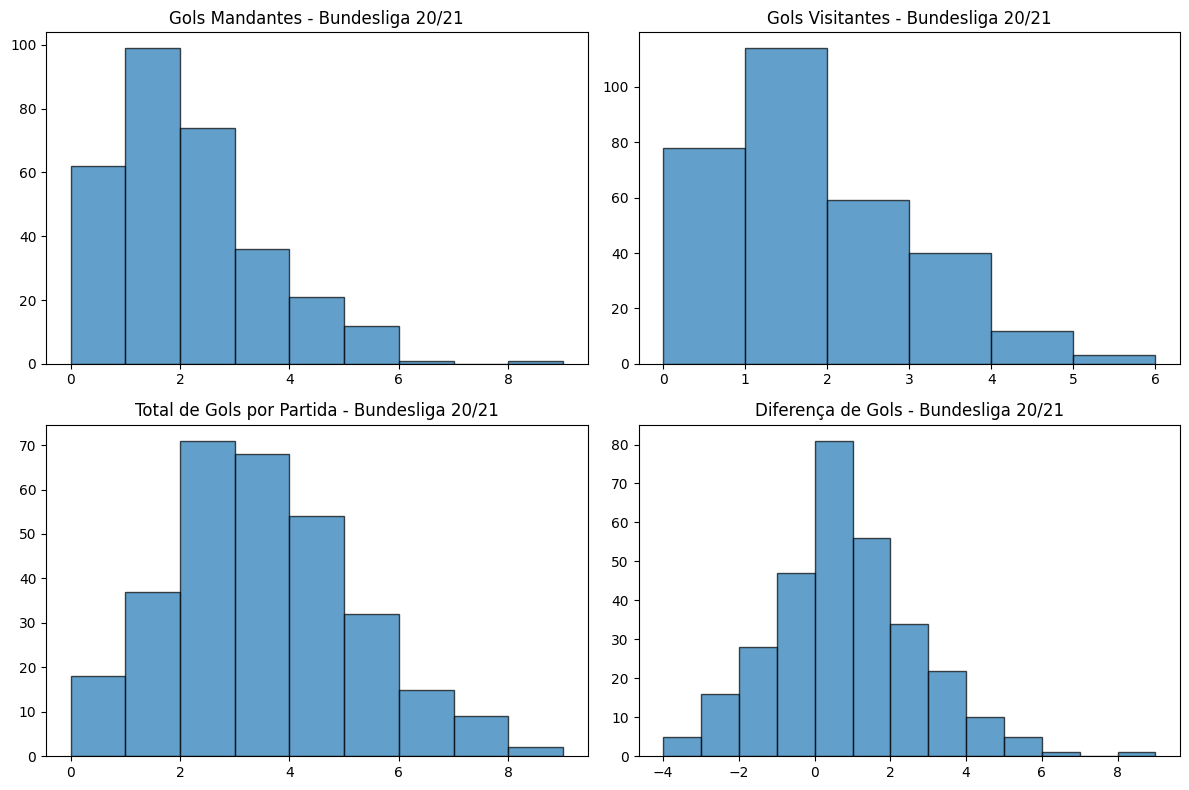

'A principal diferença perceptível entre as análises são a menor aparição de outliers (jogos com muitos gols para mandante ou visitante), justamente porque temos menos jogos sendo analisados, quanto ao restante, a liga parece seguir o mesmo padrão dos dados gerais'

In [31]:
df_bundesliga = df_clean[(df_clean["Lge"] == "GER1") & (df_clean["Sea"] == "20-21")]

gols_mandante_b = df_bundesliga["HS"]
gols_visitante_b = df_bundesliga["AS"]
gols_totais_b = df_bundesliga["HS"] + df_bundesliga["AS"]
diferenca_gols_b = df_bundesliga["GD"]

# Criar histogramas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogramas individuais
axes[0, 0].hist(gols_mandante_b, bins=range(0, max(gols_mandante_b)+2), edgecolor='black', alpha=0.7)
axes[0, 0].set_title("Gols Mandantes - Bundesliga 20/21")

axes[0, 1].hist(gols_visitante_b, bins=range(0, max(gols_visitante_b)+2), edgecolor='black', alpha=0.7)
axes[0, 1].set_title("Gols Visitantes - Bundesliga 20/21")

axes[1, 0].hist(gols_totais_b, bins=range(0, max(gols_totais_b)+2), edgecolor='black', alpha=0.7)
axes[1, 0].set_title("Total de Gols por Partida - Bundesliga 20/21")

axes[1, 1].hist(diferenca_gols_b, bins=range(min(diferenca_gols_b), max(diferenca_gols_b)+2), edgecolor='black', alpha=0.7)
axes[1, 1].set_title("Diferença de Gols - Bundesliga 20/21")

# Ajustes finais
plt.tight_layout()
plt.show()

"A principal diferença perceptível entre as análises são a menor aparição de outliers (jogos com muitos gols para mandante ou visitante), justamente porque temos menos jogos sendo analisados, quanto ao restante, a liga parece seguir o mesmo padrão dos dados gerais"

## Questão 3
- Utilizando apenas dados do campeonato selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordene a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo considerando apenas a primeira metade de jogos.

In [37]:
times = {}

for _, row in df_bundesliga.iterrows():
    mandante = row["HT"]
    visitante = row["AT"]
    gols_mandante = row["HS"]
    gols_visitante = row["AS"]

    if mandante not in times:
        times[mandante] = {"Pontos": 0, "Jogos": 0, "Vitórias": 0, "Empates": 0, "Derrotas": 0, "Gols Pró": 0, "Gols Contra": 0}
    if visitante not in times:
        times[visitante] = {"Pontos": 0, "Jogos": 0, "Vitórias": 0, "Empates": 0, "Derrotas": 0, "Gols Pró": 0, "Gols Contra": 0}

    times[mandante]["Jogos"] += 1
    times[visitante]["Jogos"] += 1
    times[mandante]["Gols Pró"] += gols_mandante
    times[mandante]["Gols Contra"] += gols_visitante
    times[visitante]["Gols Pró"] += gols_visitante
    times[visitante]["Gols Contra"] += gols_mandante

    if gols_mandante > gols_visitante:
        times[mandante]["Vitórias"] += 1
        times[mandante]["Pontos"] += 3
        times[visitante]["Derrotas"] += 1
    elif gols_mandante < gols_visitante:
        times[visitante]["Vitórias"] += 1
        times[visitante]["Pontos"] += 3
        times[mandante]["Derrotas"] += 1
    else:
        times[mandante]["Empates"] += 1
        times[visitante]["Empates"] += 1
        times[mandante]["Pontos"] += 1
        times[visitante]["Pontos"] += 1

df_classificacao = pd.DataFrame.from_dict(times, orient="index")

df_classificacao["Saldo de Gols"] = df_classificacao["Gols Pró"] - df_classificacao["Gols Contra"]

df_classificacao = df_classificacao.sort_values(by=["Pontos", "Vitórias", "Saldo de Gols", "Gols Pró"], ascending=[False, False, False, False])

df_classificacao.reset_index().rename(columns={"index": "Time"})


,Time,Pontos,Jogos,Vitórias,Empates,Derrotas,Gols Pró,Gols Contra,Saldo de Gols
0,Bayern Munich,78,34,24,6,4,99,44,55
1,RB Leipzig,65,34,19,8,7,60,32,28
2,Dortmund,64,34,20,4,10,75,46,29
3,Wolfsburg,61,34,17,10,7,61,37,24
4,Eintracht Frankfurt,60,34,16,12,6,69,53,16
5,Leverkusen,52,34,14,10,10,53,39,14
6,Union Berlin,50,34,12,14,8,50,43,7
7,Monchengladbach,49,34,13,10,11,64,56,8
8,VfB Stuttgart,45,34,12,9,13,56,55,1
9,Freiburg,45,34,12,9,13,52,52,0


In [53]:
num_jogos = len(df_bundesliga)
primeira_metade = df_bundesliga.iloc[:num_jogos // 2]

times_primeira_metade = {}

for _, row in primeira_metade.iterrows():
    mandante = row["HT"]
    visitante = row["AT"]
    gols_mandante = row["HS"]
    gols_visitante = row["AS"]

    if mandante not in times_primeira_metade:
        times_primeira_metade[mandante] = {"Pontos": 0, "Jogos": 0, "Vitórias": 0, "Empates": 0, "Derrotas": 0, "Gols Pró": 0, "Gols Contra": 0}
    if visitante not in times_primeira_metade:
        times_primeira_metade[visitante] = {"Pontos": 0, "Jogos": 0, "Vitórias": 0, "Empates": 0, "Derrotas": 0, "Gols Pró": 0, "Gols Contra": 0}

    times_primeira_metade[mandante]["Jogos"] += 1
    times_primeira_metade[visitante]["Jogos"] += 1
    times_primeira_metade[mandante]["Gols Pró"] += gols_mandante
    times_primeira_metade[mandante]["Gols Contra"] += gols_visitante
    times_primeira_metade[visitante]["Gols Pró"] += gols_visitante
    times_primeira_metade[visitante]["Gols Contra"] += gols_mandante

    if gols_mandante > gols_visitante:
        times_primeira_metade[mandante]["Vitórias"] += 1
        times_primeira_metade[mandante]["Pontos"] += 3
        times_primeira_metade[visitante]["Derrotas"] += 1
    elif gols_mandante < gols_visitante:
        times_primeira_metade[visitante]["Vitórias"] += 1
        times_primeira_metade[visitante]["Pontos"] += 3
        times_primeira_metade[mandante]["Derrotas"] += 1
    else:
        times_primeira_metade[mandante]["Empates"] += 1
        times_primeira_metade[visitante]["Empates"] += 1
        times_primeira_metade[mandante]["Pontos"] += 1
        times_primeira_metade[visitante]["Pontos"] += 1

df_classificacao_primeira_metade = pd.DataFrame.from_dict(times_primeira_metade, orient="index")

df_classificacao_primeira_metade["Saldo de Gols"] = df_classificacao_primeira_metade["Gols Pró"] - df_classificacao_primeira_metade["Gols Contra"]

df_classificacao_primeira_metade = df_classificacao_primeira_metade.sort_values(by=["Pontos", "Vitórias", "Saldo de Gols", "Gols Pró"], ascending=[False, False, False, False])

df_classificacao_primeira_metade.reset_index().rename(columns={"index": "Time"})


,Time,Pontos,Jogos,Vitórias,Empates,Derrotas,Gols Pró,Gols Contra,Saldo de Gols
0,Bayern Munich,39,17,12,3,2,49,25,24
1,RB Leipzig,35,17,10,5,2,29,14,15
2,Leverkusen,32,17,9,5,3,32,17,15
3,Dortmund,29,17,9,2,6,33,22,11
4,Wolfsburg,29,17,7,8,2,26,19,7
5,Union Berlin,28,17,7,7,3,32,21,11
6,Monchengladbach,28,17,7,7,3,31,26,5
7,Eintracht Frankfurt,27,17,6,9,2,30,26,4
8,Freiburg,24,17,6,6,5,31,28,3
9,VfB Stuttgart,22,17,5,7,5,32,27,5


## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um grid com as probabilidades associadas a cada placar possível.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  goals   No. Observations:                   24
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.616
Date:                Tue, 25 Mar 2025   Deviance:                       13.263
Time:                        22:40:11   Pearson chi2:                     9.60
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1778
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

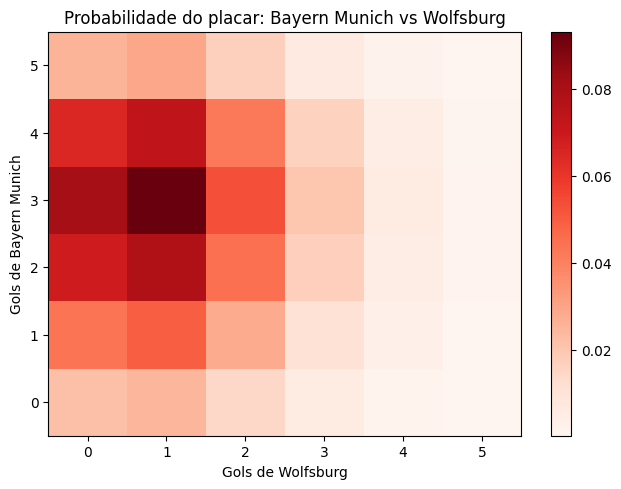

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from scipy.stats import poisson

# Supondo que df_clean seja o dataframe com os dados da Bundesliga
df_bundesliga = df_clean[(df_clean["Lge"] == "GER1") & (df_clean["Sea"] == "20-21")]

# Filtrar os jogos entre os times escolhidos
teams = ['Bayern Munich', 'RB Leipzig', 'Dortmund', 'Wolfsburg']
df_filtered = df_bundesliga[df_bundesliga['HT'].isin(teams) & df_bundesliga['AT'].isin(teams)]

# Preparar os dados para a regressão de Poisson
goal_model_data = pd.concat([df_filtered[['HT', 'AT', 'HS']].assign(home=1).rename(columns={'HT':'team', 'AT':'opponent', 'HS':'goals'}),
                             df_filtered[['AT', 'HT', 'AS']].assign(home=0).rename(columns={'AT':'team', 'HT':'opponent', 'AS':'goals'})])

# Ajuste do modelo de Poisson
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, family=sm.families.Poisson()).fit()

# Exibir o sumário do modelo
print(poisson_model.summary())

# Definir os times para a simulação
home_team = 'Bayern Munich'
away_team = 'Wolfsburg'

# Prever os gols esperados para o jogo
home_score_rate = poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team, 'home': 1}, index=[1]))
away_score_rate = poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team, 'home': 0}, index=[1]))

print(f"{home_team} contra {away_team} espera-se que marque: {home_score_rate}")
print(f"{away_team} contra {home_team} espera-se que marque: {away_score_rate}")

# Simular o placar
home_goals = np.random.poisson(home_score_rate)
away_goals = np.random.poisson(away_score_rate)

print(f"{home_team}: {home_goals[0]}")
print(f"{away_team}: {away_goals[0]}")

# Função para simular o jogo e gerar a matriz de probabilidades
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=5):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 'opponent': awayTeam, 'home': 1}, index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 'opponent': homeTeam, 'home': 0}, index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

# Gerar a matriz de probabilidades
max_goals = 5
score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals)

# Plotar a matriz de probabilidades
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
pos = ax.imshow(score_matrix, extent=[-0.5, max_goals + 0.5, -0.5, max_goals + 0.5], aspect='auto', cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title(f'Probabilidade do placar: {home_team} vs {away_team}')
plt.xlim((-0.5, 5.5))
plt.ylim((-0.5, 5.5))
plt.tight_layout()
ax.set_xlabel(f'Gols de {away_team}')
ax.set_ylabel(f'Gols de {home_team}')
plt.show()

## Questão 5
- Utilize o modelo treinado para simular os placares de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 são empates.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? Como você interpreta essa comparação? É possível identificar aspectos que o modelo subestima/superestima? É possível identificar times que tiveram campanhas "sortudas" ou "azaradas"?

In [45]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from scipy.stats import poisson

# Supondo que df_clean seja o dataframe com os dados da Bundesliga
df_bundesliga = df_clean[(df_clean["Lge"] == "GER1") & (df_clean["Sea"] == "20-21")]

# Preparar os dados para a regressão de Poisson
goal_model_data = pd.concat([
    df_bundesliga[['HT', 'AT', 'HS']].assign(home=1).rename(columns={'HT': 'team', 'AT': 'opponent', 'HS': 'goals'}),
    df_bundesliga[['AT', 'HT', 'AS']].assign(home=0).rename(columns={'AT': 'team', 'HT': 'opponent', 'AS': 'goals'})
])

# Ajuste do modelo de Poisson
poisson_model = smf.glm(
    formula="goals ~ home + team + opponent",
    data=goal_model_data,
    family=sm.families.Poisson()
).fit()

# Simular os resultados esperados
def simulate_match(foot_model, homeTeam, awayTeam):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 'opponent': awayTeam, 'home': 1}, index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 'opponent': homeTeam, 'home': 0}, index=[1])).values[0]

    home_goals = np.random.poisson(home_goals_avg)
    away_goals = np.random.poisson(away_goals_avg)
    return home_goals, away_goals


In [59]:
# Criar tabela de classificação
times = {}

for _, match in df_bundesliga.iterrows():
    mandante, visitante = match['HT'], match['AT']
    gols_mandante, gols_visitante = simulate_match(poisson_model, mandante, visitante)

    if mandante not in times:
        times[mandante] = {"Pontos": 0, "Jogos": 0, "Vitórias": 0, "Empates": 0, "Derrotas": 0, "Gols Pró": 0, "Gols Contra": 0}
    if visitante not in times:
        times[visitante] = {"Pontos": 0, "Jogos": 0, "Vitórias": 0, "Empates": 0, "Derrotas": 0, "Gols Pró": 0, "Gols Contra": 0}

    times[mandante]["Jogos"] += 1
    times[visitante]["Jogos"] += 1
    times[mandante]["Gols Pró"] += gols_mandante
    times[mandante]["Gols Contra"] += gols_visitante
    times[visitante]["Gols Pró"] += gols_visitante
    times[visitante]["Gols Contra"] += gols_mandante

    if abs(gols_mandante - gols_visitante) < 0.5:
        times[mandante]["Empates"] += 1
        times[visitante]["Empates"] += 1
        times[mandante]["Pontos"] += 1
        times[visitante]["Pontos"] += 1
    elif gols_mandante > gols_visitante:
        times[mandante]["Vitórias"] += 1
        times[mandante]["Pontos"] += 3
        times[visitante]["Derrotas"] += 1
    else:
        times[visitante]["Vitórias"] += 1
        times[visitante]["Pontos"] += 3
        times[mandante]["Derrotas"] += 1

# Criar DataFrame da classificação
df_classificacao = pd.DataFrame.from_dict(times, orient="index")
df_classificacao["Saldo de Gols"] = df_classificacao["Gols Pró"] - df_classificacao["Gols Contra"]
df_classificacao = df_classificacao.sort_values(by=["Pontos", "Vitórias", "Saldo de Gols", "Gols Pró"], ascending=[False, False, False, False])
df_classificacao = df_classificacao.reset_index().rename(columns={"index": "Time"})

from tabulate import tabulate

print(tabulate(df_classificacao, headers="keys", tablefmt="psql"))

+----+---------------------+----------+---------+------------+-----------+------------+------------+---------------+-----------------+
|    | Time                |   Pontos |   Jogos |   Vitórias |   Empates |   Derrotas |   Gols Pró |   Gols Contra |   Saldo de Gols |
|----+---------------------+----------+---------+------------+-----------+------------+------------+---------------+-----------------|
|  0 | Bayern Munich       |       84 |      34 |         27 |         3 |          4 |        104 |            38 |              66 |
|  1 | RB Leipzig          |       76 |      34 |         23 |         7 |          4 |         66 |            21 |              45 |
|  2 | Eintracht Frankfurt |       61 |      34 |         19 |         4 |         11 |         62 |            49 |              13 |
|  3 | Dortmund            |       61 |      34 |         17 |        10 |          7 |         71 |            47 |              24 |
|  4 | Wolfsburg           |       57 |      34 |      

In [61]:
"A princípio, observa-se que tanto os melhores quanto os piores times parecem ter mantido sua campanha, mostrando-se muito acima ou abaixo do nível do campeonato, porém observa-se que times como o Leverkusen parecem ter tido uma temporada acima do esperado."

'A princípio, observa-se que tanto os melhores quanto os piores times parecem ter mantido sua campanha, mostrando-se muito acima ou abaixo do nível do campeonato, porém observa-se que times como o Leverkusen parecem ter tido uma temporada acima do esperado.'